## Project 1 - MLPs and CNN for image classification
***

### **Import Libraries**
*** 

In [ ]:
import gc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
%matplotlib inline

from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, MaxPool2D # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed
from tensorflow.keras.callbacks import EarlyStopping

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.1



### **Define Functions**
*** 

In [ ]:
# Plot modeing results
def plot_history(hs, model, x_train, y_train, x_test, y_test):
  # Accuracy on Train/ Test
  score_tr = model.evaluate(x_train, y_train, verbose=0)
  print('Train accuracy:', round(score_tr[1],4))
  score_ts = model.evaluate(x_test, y_test, verbose=0)
  print('Test accuracy:', round(score_ts[1],4))
  
  print()
  
  # Monitor Accuracy during training
  #plt.style.use('dark_background')
  plt.rcParams['figure.figsize'] = [8,5]
  plt.rcParams['font.size'] = 14
  plt.clf()
  plt.plot(hs.history['loss'])
  plt.plot(hs.history['val_loss'])
  plt.title('Monitor Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

###**Solve with MLP**
***

#### Load Data
***

In [ ]:
classes = 10 

# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Process data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
label_indexes = y_train
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

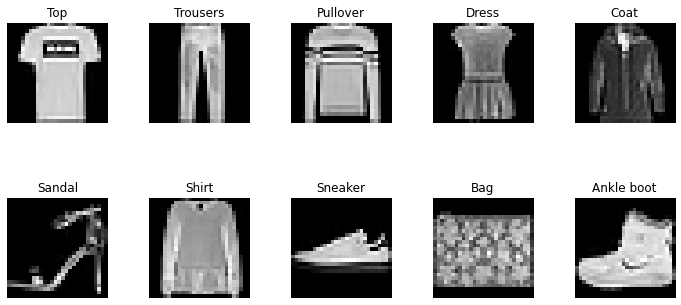

In [ ]:
# Plot one example of each class
labels = ["Top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
fig, axes = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(10, 5)
fig.tight_layout()
for target_class in range(10):
  plt.subplot(2,5,target_class+1)
  plt.axis('off')
  plt.imshow(x_train[label_indexes==target_class][0], cmap=plt.get_cmap('gray'))
  plt.title(labels[target_class])
  

#### Model
***

#### Baseline classifier

In [ ]:
# Model/ train parameters
epochs=100
batch_size=128
hidden_activation='relu'
output_activation='softmax'
optimizer=Adam()
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
verbose=0

# Set seeds for reproducible results
np.random.seed(6666) 
set_seed(1111) 
    
# Create model
input = Input(shape=(28,28), name='Input')
input_flat = Flatten(name='Flatten_Image')(input)
output = Dense(units=classes, kernel_initializer='glorot_uniform', activation=output_activation, name='Output')(input_flat)

bl_model = Model(inputs=input, outputs=output)
bl_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

bl_hs = bl_model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=epochs, verbose=verbose, callbacks=[early_stopping], batch_size=batch_size)

bl_model.summary() 

Restoring model weights from the end of the best epoch.
Epoch 00044: early stopping
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
Flatten_Image (Flatten)      (None, 784)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Train accuracy: 0.8707
Test accuracy: 0.846



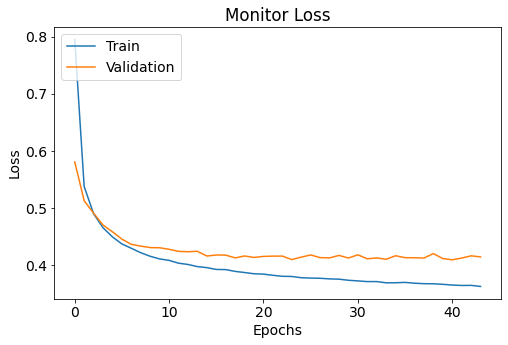

In [ ]:
plot_history(bl_hs, bl_model, x_train, y_train, x_test, y_test)

#### MLP - 1

In [ ]:
# Model/ train parameters
epochs=100
batch_size=128
hidden_activation='relu'
output_activation='softmax'
optimizer=Adam() #optimizer = SGD(lr=0.01, momentum=0.975, decay=2e-06, nesterov=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
verbose=0

# Set seeds for reproducible results
np.random.seed(6666) 
set_seed(1111) 
    
# Create model
input = Input(shape=(28,28), name='Input')
input_flat = Flatten()(input)
dense_1 = Dense(units=256, kernel_initializer='glorot_uniform', activation=hidden_activation, name='Hidden1')(input_flat)
output = Dense(units=classes, kernel_initializer='glorot_uniform', activation=output_activation, name='Output')(dense_1)

mlp1_model = Model(inputs=input, outputs=output)
mlp1_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

mlp1_hs = mlp1_model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=epochs, verbose=verbose, callbacks=[early_stopping], batch_size=batch_size)

mlp1_model.summary() 

Restoring model weights from the end of the best epoch.
Epoch 00037: early stopping
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
Output (Dense)               (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Train accuracy: 0.9455
Test accuracy: 0.8918



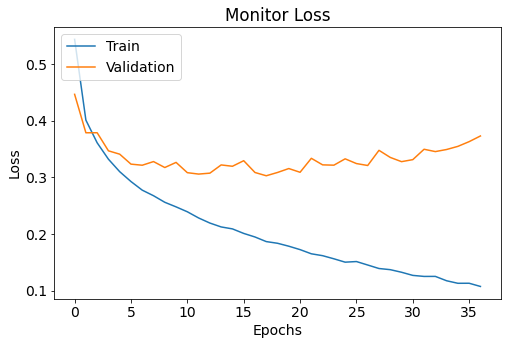

In [ ]:
plot_history(mlp1_hs, mlp1_model, x_train, y_train, x_test, y_test)

#### MLP - 2

In [ ]:
# Model/ train parameters
epochs=100
batch_size=128
hidden_activation='relu'
output_activation='softmax'
optimizer=Adam() #optimizer = SGD(lr=0.01, momentum=0.975, decay=2e-06, nesterov=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
verbose=0

# Set seeds for reproducible results
np.random.seed(6666) 
set_seed(1111) 
    
# Create model
input = Input(shape=(28,28), name='Input')
input_flat = Flatten()(input)
dense_1 = Dense(units=256, kernel_initializer='glorot_uniform', activation=hidden_activation, name='Hidden1')(input_flat)
dense_1_do = Dropout(0.4)(dense_1)
dense_2 = Dense(units=128, kernel_initializer='glorot_uniform', activation=hidden_activation, name='Hidden2')(dense_1_do)
dense_2_do = Dropout(0.4)(dense_2)
dense_3 = Dense(units=100, kernel_initializer='glorot_uniform', activation=hidden_activation, name='Hidden3')(dense_2_do)
dense_3_do = Dropout(0.4)(dense_3)
output = Dense(units=classes, kernel_initializer='glorot_uniform', activation=output_activation, name='Output')(dense_3_do)

mlp2_model = Model(inputs=input, outputs=output)
mlp2_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

mlp2_hs = mlp2_model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=epochs, verbose=verbose, callbacks=[early_stopping], batch_size=batch_size)

mlp2_model.summary() 

Restoring model weights from the end of the best epoch.
Epoch 00055: early stopping
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Hidden2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________

Train accuracy: 0.9206
Test accuracy: 0.8899



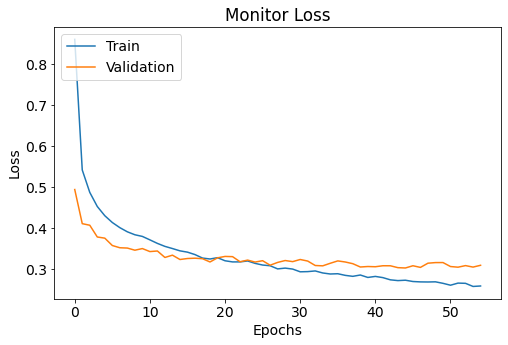

In [ ]:
plot_history(mlp2_hs, mlp2_model, x_train, y_train, x_test, y_test)

### **Solve with CNN**
*** 

#### Load Data
***

In [ ]:
classes = 10

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Process data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = to_categorical(y_train, classes)
Y_test = to_categorical(y_test, classes)

4423680/4422102 [==============================] - 0s 0us/step


#### Model
***

#### CNN - 1

In [ ]:
# Model/ train parameters
epochs=100
batch_size=128
hidden_activation='relu'
conv_activation='relu'
output_activation='softmax'
optimizer=Adam()
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
verbose=0

# Set seeds for reproducible results
np.random.seed(6666) 
set_seed(1111)

# Create model
input = Input(shape=input_shape, name='Input')
conv_1 = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', dilation_rate=(1, 1), activation=conv_activation, name='Conv1')(input)
mp_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='MaxPool2D1')(conv_1)
do_1 = Dropout(rate=0.2, name='Dropout1')(mp_1)
flat_1 = Flatten(name='Flatten')(do_1)
dense_1 = Dense(units=256, kernel_initializer='glorot_uniform', activation=hidden_activation, name='Hidden1')(flat_1)
dense_1_do = Dropout(0.4, name='Dropout2')(dense_1)
dense_2 = Dense(units=128, kernel_initializer='glorot_uniform', activation=hidden_activation, name='Hidden2')(dense_1_do)
dense_2_do = Dropout(0.4, name='Dropout3')(dense_2)
dense_3 = Dense(units=100, kernel_initializer='glorot_uniform', activation=hidden_activation, name='Hidden3')(dense_2_do)
dense_3_do = Dropout(0.4, name='Dropout4')(dense_3)
output = Dense(units=classes, kernel_initializer='glorot_uniform', activation=output_activation, name='Output')(dense_3_do)

# Define the model and train it.
cnn1_model = Model(inputs=input, outputs=output)
cnn1_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

cnn1_hs = cnn1_model.fit(x=X_train, y=Y_train, validation_split=0.2, epochs=epochs, verbose=verbose, callbacks=[early_stopping], batch_size=batch_size)

cnn1_model.summary()

Restoring model weights from the end of the best epoch.
Epoch 00044: early stopping
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 28, 28, 16)        160       
_________________________________________________________________
MaxPool2D1 (MaxPooling2D)    (None, 14, 14, 16)        0         
_________________________________________________________________
Dropout1 (Dropout)           (None, 14, 14, 16)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
Hidden1 (Dense)              (None, 256)               803072    
_________________________________________

Train accuracy: 0.9311
Test accuracy: 0.9008



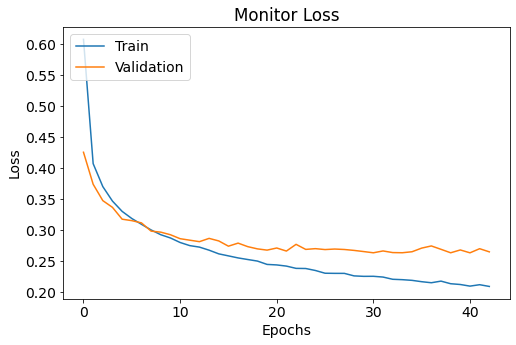

In [ ]:
plot_history(cnn1_hs, cnn1_model, X_train, Y_train, X_test, Y_test)

#### CNN - 2

In [ ]:
# Model/ train parameters
epochs=100
batch_size=128
hidden_activation='relu'
conv_activation='relu'
output_activation='softmax'
optimizer=Adam()
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
verbose=0

# Set seeds for reproducible results
np.random.seed(6666) 
set_seed(1111)

# Create model
input = Input(shape=input_shape, name='Input')
conv_1 = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', dilation_rate=(1, 1), activation=conv_activation, name='Conv1')(input)
mp_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='MaxPool2D1')(conv_1)
do_1 = Dropout(rate=0.2, name='Dropout1')(mp_1)
conv_2 = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', dilation_rate=(1, 1), activation=conv_activation, name='Conv2')(do_1)
mp_2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='MaxPool2D2')(conv_2)
do_2 = Dropout(rate=0.2, name='Dropout2')(mp_2)
flat_2 = Flatten(name='Flatten')(do_2)
dense_1 = Dense(units=256, kernel_initializer='glorot_uniform', activation=hidden_activation, name='Hidden1')(flat_2)
dense_1_do = Dropout(0.4, name='Dropout3')(dense_1)
output = Dense(units=classes, activation=output_activation, name='Output')(dense_1_do)

# Define the model and train it.
cnn2_model = Model(inputs=input, outputs=output)
cnn2_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

cnn2_hs = cnn2_model.fit(x=X_train, y=Y_train, validation_split=0.1, epochs=epochs, verbose=verbose, callbacks=[early_stopping], batch_size=batch_size)

cnn2_model.summary()

Restoring model weights from the end of the best epoch.
Epoch 00043: early stopping
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 28, 28, 16)        160       
_________________________________________________________________
MaxPool2D1 (MaxPooling2D)    (None, 14, 14, 16)        0         
_________________________________________________________________
Dropout1 (Dropout)           (None, 14, 14, 16)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 14, 14, 32)        4640      
_________________________________________________________________
MaxPool2D2 (MaxPooling2D)    (None, 7, 7, 32)          0         
_________________________________________

Train accuracy: 0.9685
Test accuracy: 0.9272



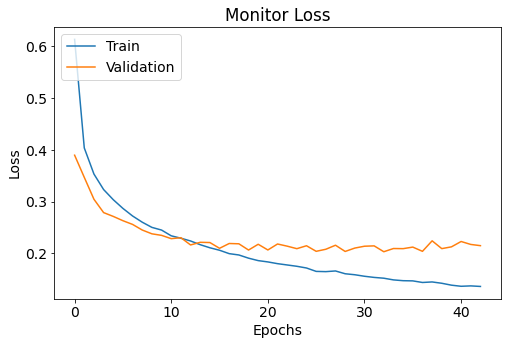

In [ ]:
plot_history(cnn2_hs, cnn2_model, X_train, Y_train, X_test, Y_test)